# Gasping for Clues:
## Unraveling the Atmosphere's Mysterious Behavior
The following analysis seeks to determine how the atmospheric levels of methane, carbon dioxide, and nitrus oxide are changing over time, and furthermore, how these gases are interacting with each other.

In [268]:
import urllib.request
import json
import os
import pandas as pd
import datetime
import time
import math

# Task 1: Data Identification and Collection

### Data Identification

3 APIs were chosen from https://global-warming.org/ as follows:

https://global-warming.org/api/co2-api

https://global-warming.org/api/nitrous-oxide-api

https://global-warming.org/api/methane-api

These APIs are freely available and no API key is required.

A dataset was retrieved from each API, containing data relating to concentrations of CO2, Nitrous Oxide, and Methane in the Earth's atmosphere.

The methane and nitrous oxide data is updated on a monthly basis, while the CO2 data is updated daily. Ammendments will be made so that all 3 datasets may be simultaneously analysed.

### Data Collection

In [269]:
#function to call API, retrieve raw json data, write data to json file
def get_write_data(url, new_file_name):
    response = urllib.request.urlopen(url)
    raw_json = response.read().decode("utf-8")
    data = json.loads(raw_json)
    new_file_path = new_file_name+".json" #create new filename
    if os.path.isfile(new_file_path) == False: #check to see if filename is in use
        with open(new_file_path, "w") as newfile:
            json.dump(data, newfile)
    else:
        print("File path '%s' already exists. \nSelect a different name for file path." %new_file_path) #prompt user to selct another name for file

3 datasets will now be retrieved and written to JSON files using 'get_write_data' function

#### Carbon Dioxide (CO2)

This API provides, on a quasi-daily basis, the amount of carbon dioxide (CO2) in the atmosphere from 2010, to the present. It is expressed as a mole fraction in dry air, parts per million (ppm)

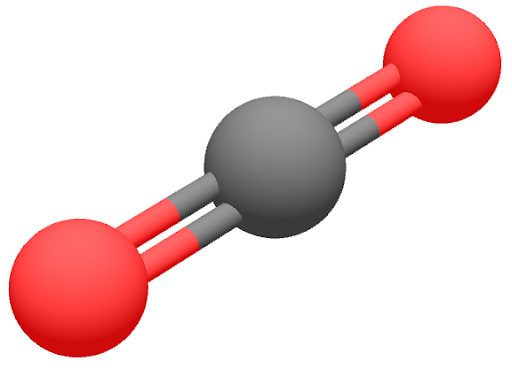

In [270]:
get_write_data("https://global-warming.org/api/co2-api", "co2_raw_data") #write data from CO2 API to JSON file

File path 'co2_raw_data.json' already exists. 
Select a different name for file path.


#### Nitrous Oxide (N₂O)

This API provides, on a monthly basis, the amount of nitrous oxide in the atmosphere from 2001 to the present. Expressed as a mole fraction in dry air, parts per million (ppm).

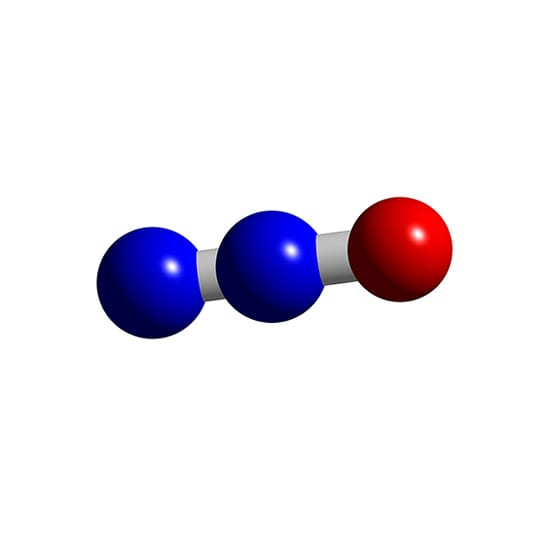

In [271]:
get_write_data("https://global-warming.org/api/nitrous-oxide-api", "nitrous_raw_data") #write data from Nitrous API to JSON file

File path 'nitrous_raw_data.json' already exists. 
Select a different name for file path.


#### Methane (CH₄)

This API provides on a monthly basis, the amount of methane in the atmosphere from 1983 to the present. Expressed as a mole fraction in dry air, parts per million (ppm).

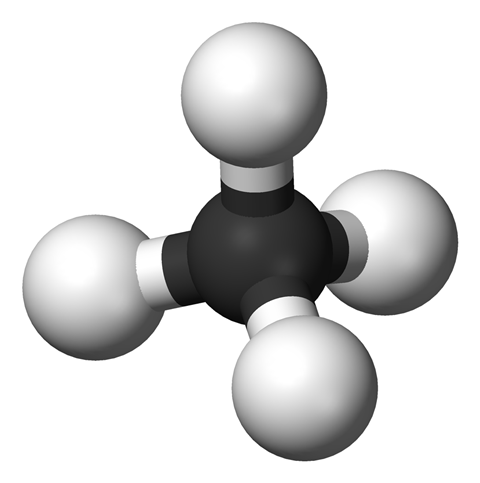

In [272]:
get_write_data("https://global-warming.org/api/methane-api", "methane_raw_data") #write data from Methane API to JSON file

File path 'methane_raw_data.json' already exists. 
Select a different name for file path.


# Task 2: Data Preperation and Analysis

### Data Pre-Processing and Preperation

As it stands, the data is spread across 3 JSON files.

A single dataset will be created that holds data from all 3 datasets.

Each element of this dataset will contain data from the original datasets pertaining to that specific date.

In order to do this, each dataset must be in the same format.

Each dataset will be loaded into its own dataframe.

I will change the format of each dataframe to have 3 columns with headings: ['date', GAS + 'cycle', GAS + 'trend'] where GAS represents either CO2, nitrous oxide, or methane.

The date format will be a 'yyyymm'. This will be a numeric value.

GAS cycle and GAS trend refer to average monthly cycle and trend of that respective gas.

The dataframes will also be adjusted to fit the same timeline.

In [273]:
#function to load each dataset into a dataframe
def json_to_df(filepath):
    fin = open(filepath, 'r') #open file to read
    x = fin.read() #read data from file to json string x
    fin.close
    data = json.loads(x) #parse json string and convert to python dictionary
    list = []
    for i in data.keys(): #iterate through dictionary keys, their is only one key in the primary object in the json file and this is the name of the gas in question, therefore the useful data resides in the value of this primary object
        list.append(i) #add primary object key to a list so that the key's string can be obtained
    df = pd.DataFrame(data[list[0]]) # create a dataframe using the list of dictionaries that is the value of the json files primary object
    return df

Dataframes need to be adjusted to common format.

#### Carbon Dioxide

CO2 dataframe will be dealt with first.

In [274]:
co2_df = json_to_df("co2_raw_data.json") #create dataframe for CO2 dataset
co2_df[0:5] #observe the dataframe's structure

,year,month,day,cycle,trend
0,2011,1,1,391.25,389.76
1,2011,1,2,391.29,389.77
2,2011,1,3,391.32,389.77
3,2011,1,4,391.36,389.78
4,2011,1,5,391.39,389.79


Formats of some dates needs to be adjusted to yyyymm.

In [275]:
#create a function that adds a leading zero to each single digit member of the 'month' column for the desired date format
def leading_zero(x):
    if x < 10:
        return "%02d" % (x,)
    else:
        return x

In [276]:
co2_df['month'] = pd.to_numeric(co2_df['month']) #convert 'month' field to numeric form
co2_df['month'] = (co2_df['month'].apply(lambda x: leading_zero(x))) #leading zero function applied to each member of 'month'
co2_df['month'] = (co2_df['month'].apply(lambda x: str(x))) #'month' values converted to strings before assembling 'date' values
co2_df['year'] = (co2_df['year']) + "" + (co2_df['month']) + ".0" #'year' column is converted to 'date' column in preferred format
co2_df = co2_df.drop(['month'], axis = 1)
co2_df = co2_df.drop(['day'], axis = 1) #month and day columns are no longer needed and thus removed
co2_df = co2_df.rename(columns = {'year':'date','cycle':'CO2cycle', 'trend':'CO2trend'}) #remaining columns are renamed
co2_df['CO2trend'] = (pd.to_numeric(co2_df['CO2trend']))
co2_df['CO2cycle'] = (pd.to_numeric(co2_df['CO2cycle']))
co2_df['date'] = (pd.to_numeric(co2_df['date'])) #all fields converted to numeric for sake of analysis
co2_df = co2_df.set_index('date')
co2_df[0:201110]

,CO2cycle,CO2trend
date,,
201101.0,391.25,389.76
201101.0,391.29,389.77
201101.0,391.32,389.77
201101.0,391.36,389.78
201101.0,391.39,389.79
...,...,...
201110.0,390.15,391.35
201110.0,390.21,391.35
201110.0,390.28,391.36


CO2 dataset provides data on a daily basis, while other 2 datasets provide monthly average data.

Monthly average data for CO2 data will be found and dataframe will be adjusted to incorporate this so that all dataframes may be in same format.

In [277]:
co2_df = co2_df.groupby('date').mean() #reduce dataset to monthly data based on monthly averages - this is the format of the other datasets
co2_df['CO2cycle'] = co2_df['CO2cycle'].round(decimals = 2)
co2_df['CO2trend'] = co2_df['CO2trend'].round(decimals = 2) #round figures to 2 decimals
co2_df[:201110]

,CO2cycle,CO2trend
date,,
201101.0,391.62,389.85
201102.0,391.73,390.03
201103.0,391.81,390.20
201104.0,392.26,390.37
201105.0,392.39,390.53
201106.0,391.48,390.69
201107.0,389.20,390.85
201108.0,387.53,391.00
201109.0,387.97,391.15


#### Nitrous Oxide

Fewer adjustment are required for this dataset compared to the CO2 dataset.

The headings will be altred, the last 2 columns will be removed and a function will be produced to alter the date variable format.

In [278]:
nitrous_df = json_to_df("nitrous_raw_data.json") #create dataframe for nitrous oxide dataset
nitrous_df[0:5]

,date,average,trend,averageUnc,trendUnc
0,2001.3,316.2,316.2,0.2,0.1
1,2001.4,316.1,316.2,0.1,0.1
2,2001.5,316.1,316.3,0.1,0.1
3,2001.6,316.2,316.3,0.1,0.1
4,2001.7,316.2,316.4,0.1,0.1


A new function will be required to alter the date format for the Nitrous Oxide and Methane datasets.

In [279]:
#create function that changes format of date field
def format_date(date):
    if date[-2] == '.':
        new_date = (100*float(date[:-1] + "0" + date[-1]))
        return int(new_date)
    else:
        return (100*float(date))

In [280]:
nitrous_df['date'] = nitrous_df['date'].apply(lambda x: format_date(x)) #apply the format_date function to the date field
nitrous_df = nitrous_df.drop(['averageUnc'], axis = 1)
nitrous_df = nitrous_df.drop(['trendUnc'], axis = 1) #remove fields that are not needed
nitrous_df = nitrous_df.rename(columns = {'average':'Nitrouscycle','trend':'Nitroustrend'})
nitrous_df['date'] = pd.to_numeric(nitrous_df['date'])
nitrous_df['Nitrouscycle'] = pd.to_numeric(nitrous_df['Nitrouscycle'])
nitrous_df['Nitroustrend'] = pd.to_numeric(nitrous_df['Nitroustrend']) # convertfields to numeric field
nitrous_df = nitrous_df.set_index('date')

In [281]:
nitrous_df[200103:200105]

,Nitrouscycle,Nitroustrend
date,,
200103.0,316.2,316.2
200104.0,316.1,316.2
200105.0,316.1,316.3


#### Methane

Above procedure will be repeated for Methane dataset.

In [282]:
methane_df = json_to_df("methane_raw_data.json") #create dataframe for nitrous oxide dataset
methane_df['date'] = methane_df['date'].apply(lambda x: format_date(x))
methane_df = methane_df.drop(['averageUnc'], axis = 1)
methane_df = methane_df.drop(['trendUnc'], axis = 1)
methane_df = methane_df.rename(columns = {'average':'Methanecycle','trend':'Methanetrend'})
methane_df['date'] = pd.to_numeric(methane_df['date'])
methane_df['Methanecycle'] = pd.to_numeric(methane_df['Methanecycle'])
methane_df['Methanetrend'] = pd.to_numeric(methane_df['Methanetrend'])
methane_df = methane_df.set_index('date')

In [283]:
methane_df

,Methanecycle,Methanetrend
date,,
198307.0,1625.9,1634.6
198308.0,1628.1,1635.3
198309.0,1638.4,1636.0
198310.0,1644.8,1636.7
198311.0,1642.6,1637.5
...,...,...
202007.0,1871.5,1880.9
202008.0,1876.5,1882.7
202009.0,1884.8,1884.4


#### Producing Singular Dataset

The next step is to establish a common timeframe between the datasets.

This will be set as as the beginning of 2011 until the end of 2019 as this is the widest timeframe common to all 3 datasets.

In [284]:
co2_df = co2_df[201101:201912]
methane_df = methane_df[201101:201912]
nitrous_df = nitrous_df[201101:201912] #adjust timeframe of all 3 datasets to include all dates that are common to all 3 datasets

The next step is to concatenate the dataframes using the date field as a common index.

In [285]:
df = pd.concat([co2_df, methane_df, nitrous_df], 1)

The concatenated data will now be saved as a comma seperated value file for safe keeping.

In [286]:
#create a function that converts dataframe to csv
def df_to_csv(df, filepath):
    new_file_path = filepath + ".csv"
    if os.path.isfile(new_file_path) == False:
        df.to_csv(new_file_path)
    else:
        print("Filepath in use. \nSelect new name.")

In [287]:
df_to_csv(df, "concatenated_data")

Filepath in use. 
Select new name.


Final pre-processing step to check for missing values before analysis.

In [288]:
df.isnull().sum() #check for missing values

CO2cycle        0
CO2trend        0
Methanecycle    0
Methanetrend    0
Nitrouscycle    0
Nitroustrend    0
dtype: int64

In [289]:
df.dtypes.value_counts()

float64    6
dtype: int64

In [290]:
df = df.reset_index(drop = False) #reset index dolumn

For the analysis stage, it will be beneficial if the date field is of 'datetime' data type.

In [291]:
#create a function to adjust date format and convert the data type to datetime
def new_date(date):
    date = str(math.trunc(date))
    date = date[4:6] + "-" + date[0:4]
    date = pd.to_datetime(date)
    return (date)

In [292]:
df['date'] = df['date'].apply(lambda x: new_date(x)) #apply new function to all members of date column

There are no missing values, nor are there any strings, meaning there are no values such as "No Data". This suggests that all values are present.

The result thus far is a dataframe comprising 108 rows by 7 columns, i.e., 1 row for each month over the course of 9 years. The columns each represent a seperate field, namely: CO2cycle, CO2trend, Nitrouscycle, Nitroustrend, Methanecycle, Methanetrend, with the index column representing the date in question. The dataframe is printed below.

The 'Trend' values will be removed as the analysis will deal exclusively with the 'Cycle' values.

In [293]:
df = df.drop(['CO2trend', 'Methanetrend', 'Nitroustrend'], axis = 1)
df

,date,CO2cycle,Methanecycle,Nitrouscycle
0,2011-01-01,391.62,1800.4,324.0
1,2011-02-01,391.73,1800.2,324.1
2,2011-03-01,391.81,1800.9,324.1
3,2011-04-01,392.26,1802.8,324.1
4,2011-05-01,392.39,1803.3,324.1
...,...,...,...,...
103,2019-08-01,407.28,1863.0,331.9
104,2019-09-01,407.83,1870.7,331.9
105,2019-10-01,409.37,1875.3,332.1
106,2019-11-01,410.96,1875.6,332.3


Before beginning the Analysis, a dataframe wil be composed that considers yearly averages of the data.

In [294]:
df_year = df
df_year.insert(1, 'year', df_year['date'].apply(lambda x: x.year)) #add a column that shows the year of each element of the data
df_year = df_year.drop(['date'], axis = 1)
df_year = df_year.groupby('year').mean().round(decimals = 2) #group the data by year and calculate the average values for each year
df_year

,CO2cycle,Methanecycle,Nitrouscycle
year,,,
2011,390.79,1803.13,324.22
2012,392.77,1808.10,325.07
2013,395.58,1813.46,325.95
2014,397.58,1822.72,327.09
2015,399.80,1834.35,328.18
2016,403.01,1843.15,328.96
2017,405.51,1849.72,329.75
2018,407.72,1857.39,330.92
2019,410.28,1866.64,331.89


### Data Analysis

#### Descriptive Analytics

In [295]:
print(df.describe().round(decimals = 2))

          year  CO2cycle  Methanecycle  Nitrouscycle
count   108.00    108.00        108.00        108.00
mean   2015.00    400.34       1833.18        328.00
std       2.59      6.62         22.17          2.51
min    2011.00    387.53       1796.10        324.00
25%    2013.00    394.45       1813.90        325.70
50%    2015.00    400.18       1833.15        328.05
75%    2017.00    406.30       1851.52        329.92
max    2019.00    412.18       1875.60        332.40


The above summary gives various statistics for each data field including minimum and maximum values. As can be seen, there is a significant discrepancy between the min. and max. values for each field. Inuitively, one may assume that this is due to the atmospheric concentrations of these gases increasing over time, however this must be investigated further.

#### Data Visualisation

##### Graphing with Matplotlib and Pandas

In [296]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Atmospheric Concentration of Carbon Dioxide Over Time'}, xlabel='year', ylabel='CO2 Parts per Million'>

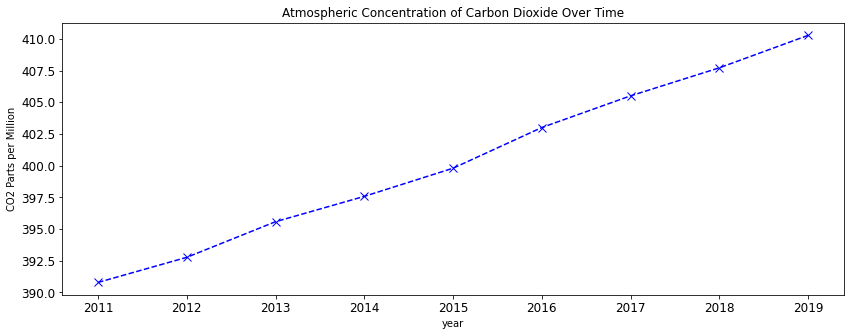

In [297]:
df_year["CO2cycle"].plot(ylabel = 'CO2 Parts per Million',title = "Atmospheric Concentration of Carbon Dioxide Over Time", figsize = (14,5), fontsize = 12,
                        marker = 'x', markersize = 8, color = 'blue', linestyle = 'dashed')

<AxesSubplot:title={'center':'Atmospheric Concentration of Nitrous Oxide Over Time'}, xlabel='year', ylabel='Nitrous Oxide Parts per Million'>

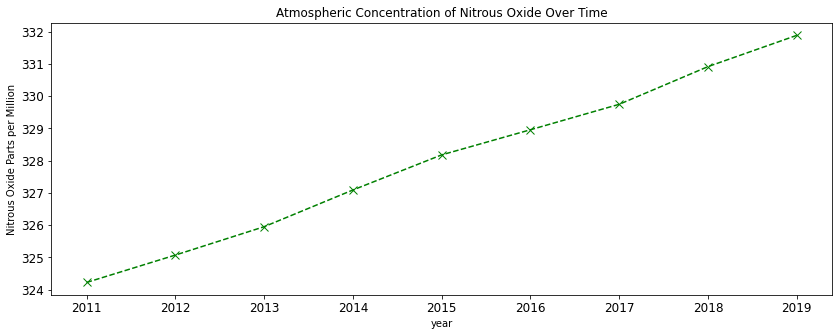

In [298]:
df_year["Nitrouscycle"].plot(ylabel = 'Nitrous Oxide Parts per Million', title = "Atmospheric Concentration of Nitrous Oxide Over Time", figsize = (14,5), fontsize = 12,
                        marker = 'x', markersize = 8, color = 'green', linestyle = 'dashed')

<AxesSubplot:title={'center':'Atmospheric Concentration of Methane Over Time'}, xlabel='year', ylabel='Methane Parts per Million'>

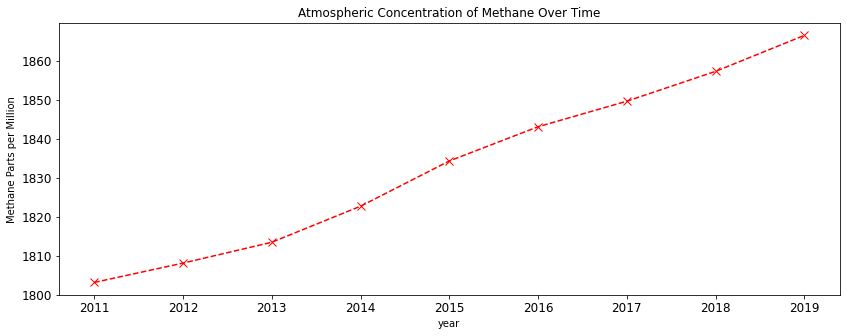

In [299]:
df_year["Methanecycle"].plot(ylabel = 'Methane Parts per Million', title = "Atmospheric Concentration of Methane Over Time", figsize = (14,5), fontsize = 12,
                        marker = 'x', markersize = 8, color = 'red', linestyle = 'dashed')

Text(0, 0.5, 'parts per million')

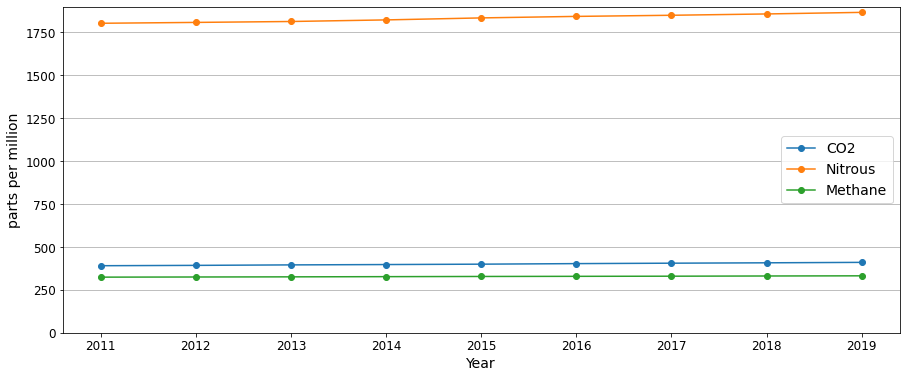

In [300]:
ax = df_year.plot(figsize=(15,6), fontsize=12, marker = 'o')
plt.ylim(0,1900)
plt.grid(axis="y")
plt.legend(["CO2","Nitrous","Methane"], fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('parts per million', fontsize=14)

The first 3 graphs strongly suggest that the atmospheric concentrations of the 3 gases have consistently increased from 2011 to 2019. The 4th graph indicates much higher levels of Methane in the atmosphere, when compared to the other 2 gases, while there is slightly higher concentrations of Nitrous Oxide compared to Carbon Dioxide.

Further analysis can be conducted using the df dataframe. This will give a more in depth view of the data on a more precise basis i.e. monthly as opposed to yearly.

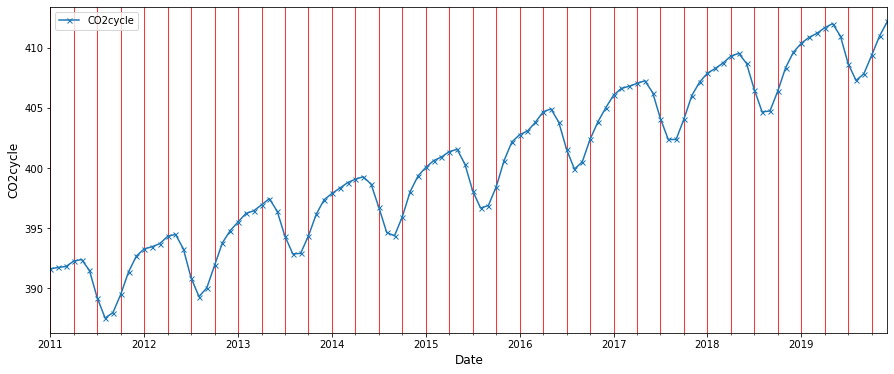

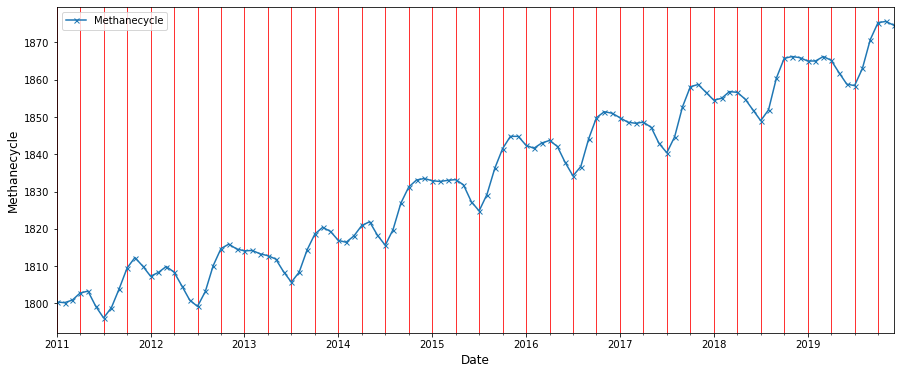

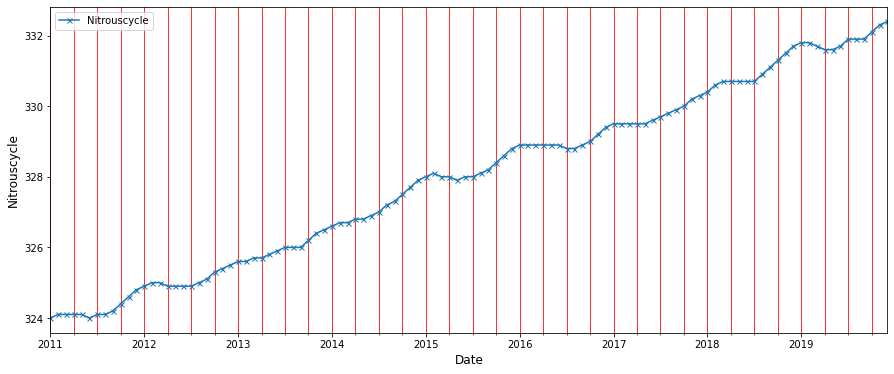

In [301]:
i = 2
while i < 5:
    ax = df.plot(x='date', y = i, figsize=(15,6), marker = 'x', markersize = 5)
    ax.grid(which = 'both', axis = 'x', color = 'r')
    plt.xlabel('Date', fontsize = 12)
    plt.ylabel(df.columns[i], fontsize = 12)
    i += 1

While the Nitrous Oxide graph indicates a relatively consistent state of growth on a monthly basis, some interesting trends can be observed from the CO2 and Methane graphs.

From the CO2 graph, it is clear that the levels of CO2 in the atmosphere are growing on a yearly basis, however there is a consistent dip in the 3rd quarter of every year. A similar trend can be observed in the Methane graph, which depicts that Methane levels consistenly experience a dip between the 2nd and 3rd quarter of every year.

It is possible that this may be caused by varying weather throughout the year, however, no weather data is present so this can not be confirmed.

Seeing as the Methane levels tend to drop before the CO2 levels, there could be a relationship between the two gases - i.e, lower Methane concentration in the atmospher could stimulate a drop in CO2.

The below scatter plot depicts a potential relationship between levels of Methane and Carbon Dioxide in the atmosphere.

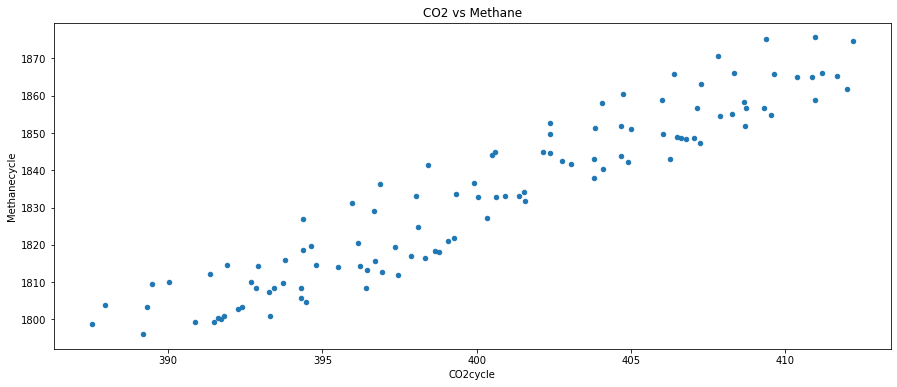

In [302]:
ax = df.plot(kind = 'scatter', title = 'CO2 vs Methane', x='CO2cycle', y = 'Methanecycle', figsize=(15,6))

A regression line can be added to allow further insight into this relationship.

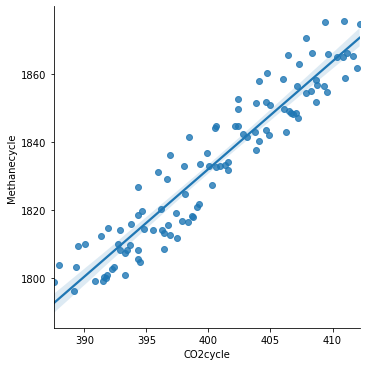

In [303]:
import seaborn as sns
sns.lmplot(x='CO2cycle',y='Methanecycle', data=df,fit_reg=True) 

The above graphs clearly suggest a correlation between CO2 and Methane levels.

A correlation coefficient may be computed to indicate the strength of the relationship between these variables.

In [304]:
df['CO2cycle'].corr(df['Methanecycle'])

0.9454897840605305

A correlation coefficient of 0.945 suggests a strong positive correlation between the level of Methane and CO2 in the atmosphere. This suggests that high/low levels of Methane in the atmosphere may result in higher/lower levels of CO2 respectively.

However it is important to acknowledge that correlation does not mean causality and there may be other factors at play here.

Further analysis should be conducted into the relationship between levels of CO2 and Methane in the atmosphere.

It would also be beneficial to explore the reasons as to why the concentrations of these gases in the atmosphere are increasing over time. One may assume that it is due to increasing fossil fuel consumption, however this should be investigated further. 

### Conclusion

A number of conclusions can be derived from the above information.

There is clear indication that the atmospheric levels of Carbon Dioxide, Nitrous Oxide, and Methane have increased over time and will continue to do so.

The amount of methane and CO2 in the atmosphere does increase over time, however there is some strange behaviour associated with these 2 gases. Every year, between the 2nd and 3rd quarters, the level of methane decreases temporarily. A similar pattern is observed for CO2 in quarter 3. Furthermore, there is a strong, positive correlation between the amount CO2 and Methane in the Earth's atmosphere, however, there is no significant evidence to suggest a causal relationship between the two.

Further research should be conducted into the relationship between CO2 and Methane concentrations in the Earth's atmosphere.

Further research should be conducted into the factors that are driving the increase with time of all 3 chemicals such as fossil fuel consumption.